In [1]:
! python -m pip install seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[Text(0.5, 1.0, 'Daily Tips ($)')]

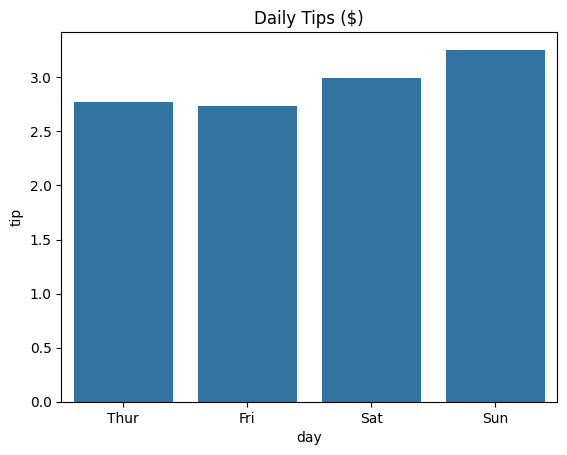

In [2]:
import seaborn as sns

tips = sns.load_dataset("tips")

(
    sns.barplot(
        data=tips, x="day", y="tip", estimator="mean", errorbar=None)
    .set(title="Daily Tips ($)")
)

In [3]:
tips = sns.load_dataset("tips")
tips["day"]

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

Text(0.5, 1.0, 'Daily Tips ($)')

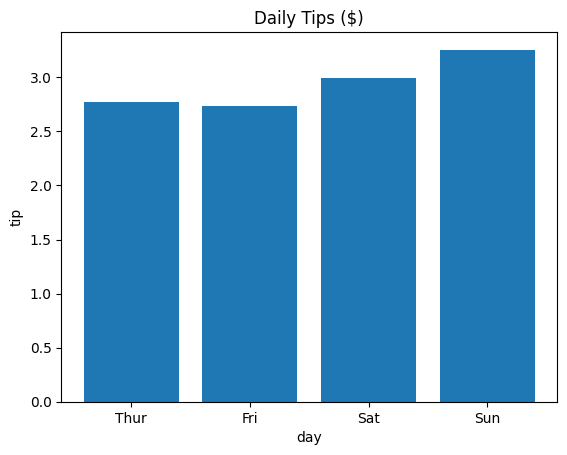

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

tips = pd.read_csv("tips.csv")

average_daily_tip = tips.groupby(["day"])["tip"].mean()

days = ["Thur", "Fri", "Sat", "Sun"]
daily_averages = [
    average_daily_tip["Thur"],
    average_daily_tip["Fri"],
    average_daily_tip["Sat"],
    average_daily_tip["Sun"],
]

fig, ax = plt.subplots()
plt.bar(x=days, height=daily_averages)
ax.set_xlabel("day")
ax.set_ylabel("tip")
ax.set_title("Daily Tips ($)")

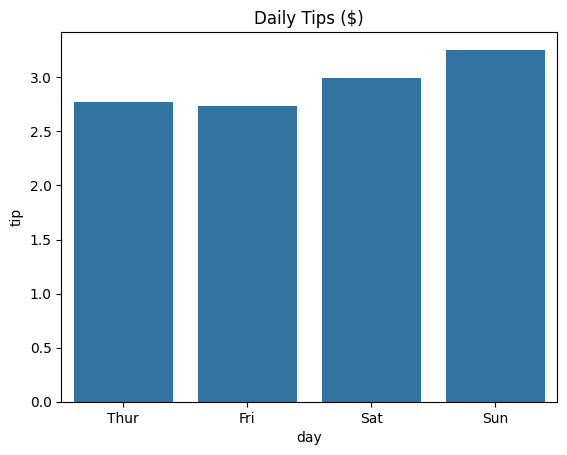

In [5]:
tips = sns.load_dataset("tips")

(
    sns.barplot(
        data=tips, x="day", y="tip", estimator="mean", errorbar=None)
    .set_title("Daily Tips ($)")
    .figure.savefig("output.png")
)

### Using Axes Level Functions


In [6]:
crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

[Text(0.5, 1.0, 'Minimum vs Maximum Temperature'),
 Text(0.5, 0, 'Minimum Temperature'),
 Text(0, 0.5, 'Maximum Temperature')]

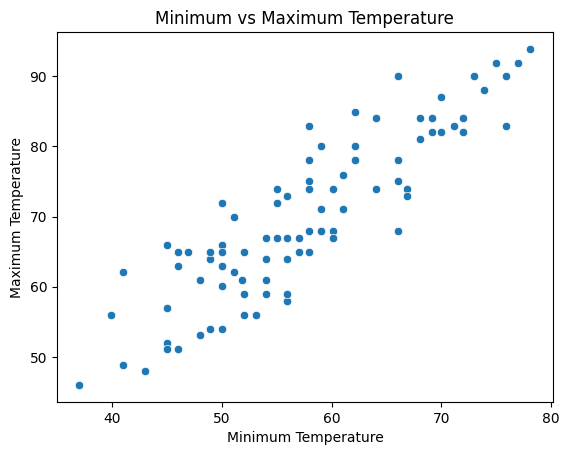

In [7]:
(
    sns.scatterplot(
        data=crossings, x="min_temp", y="max_temp")
    .set(title="Minimum vs Maximum Temperature",
         xlabel="Minimum Temperature",
         ylabel="Maximum Temperature")
)

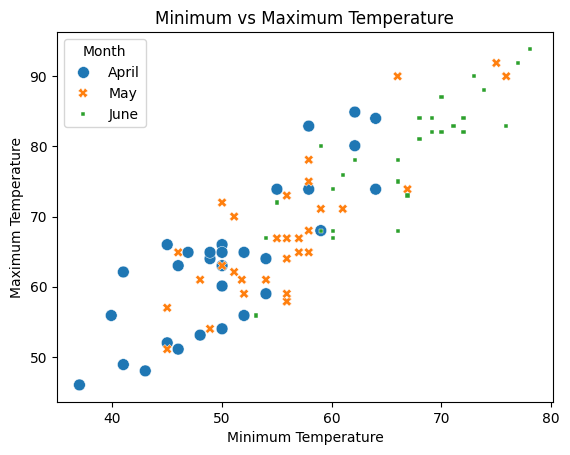

In [8]:
(
   sns.scatterplot(
        data=crossings, x="min_temp", y="max_temp",
        hue="month", size="month", style="month")
    .set(title="Minimum vs Maximum Temperature",
         xlabel="Minimum Temperature",
         ylabel="Maximum Temperature")
)

plt.legend(title="Month")

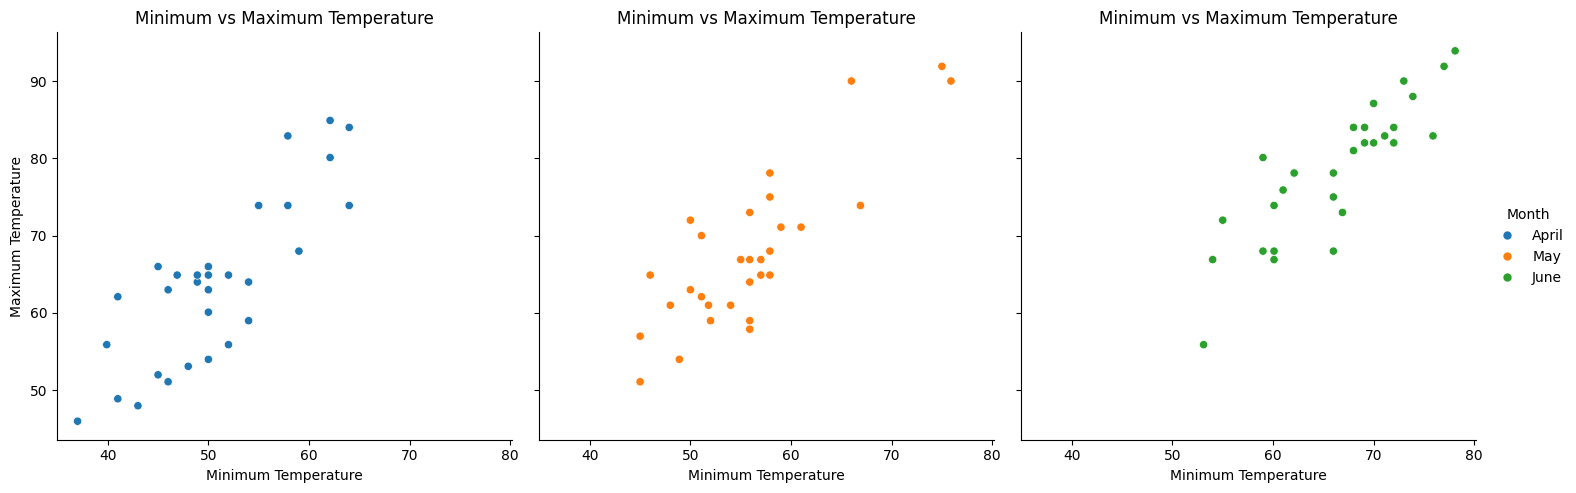

In [9]:
(
    sns.relplot(
        data=crossings,  x="min_temp", y="max_temp",
        kind="scatter", hue="month", col="month")
    .set(title="Minimum vs Maximum Temperature",
         xlabel="Minimum Temperature",
         ylabel="Maximum Temperature")
    .legend.set_title("Month")
)

## Introducing Seaborn's Objects Interface 

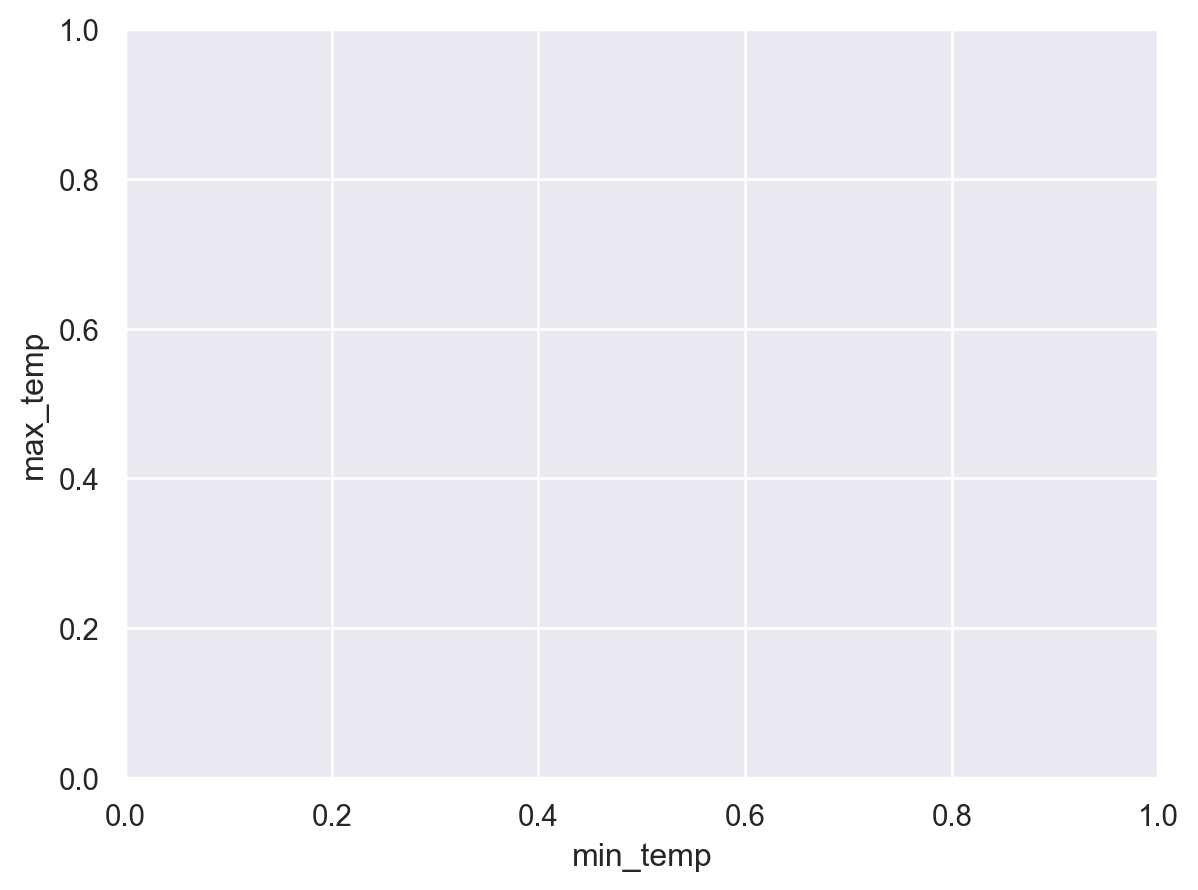

In [10]:
import seaborn.objects as so

(
    so.Plot(
        data=crossings, x="min_temp", y="max_temp")
)

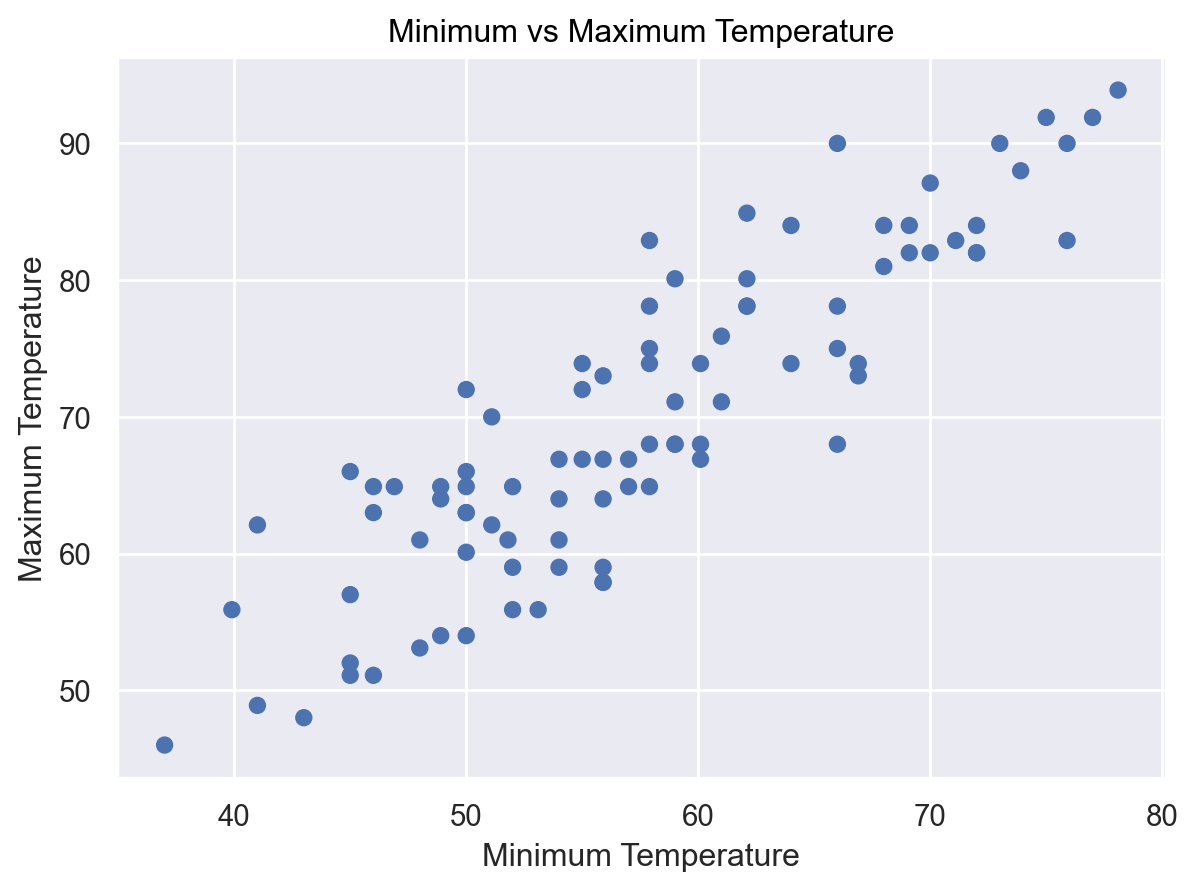

In [11]:
(
    so.Plot(
        data=crossings, x="min_temp", y="max_temp")
    .add(so.Dot())
    .label(title="Minimum vs Maximum Temperature",
           x="Minimum Temperature",y="Maximum Temperature")
)

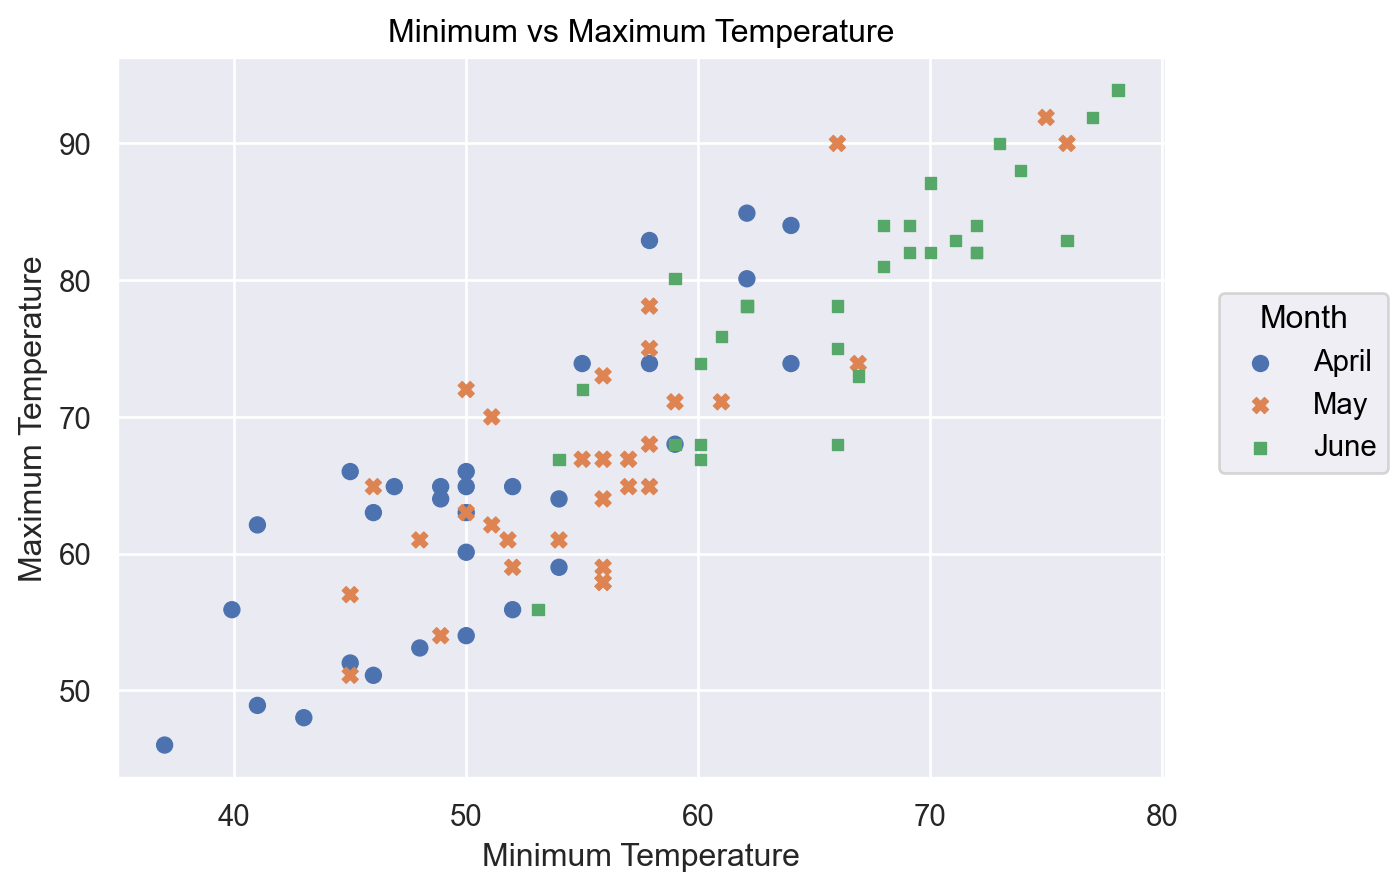

In [12]:
(
    so.Plot(
        data=crossings, x="min_temp",
        y="max_temp", color="month")
    .add(so.Dot(), marker="month")
    .label(title="Minimum vs Maximum Temperature",
           x="Minimum Temperature", y="Maximum Temperature",
           color=str.capitalize)
)

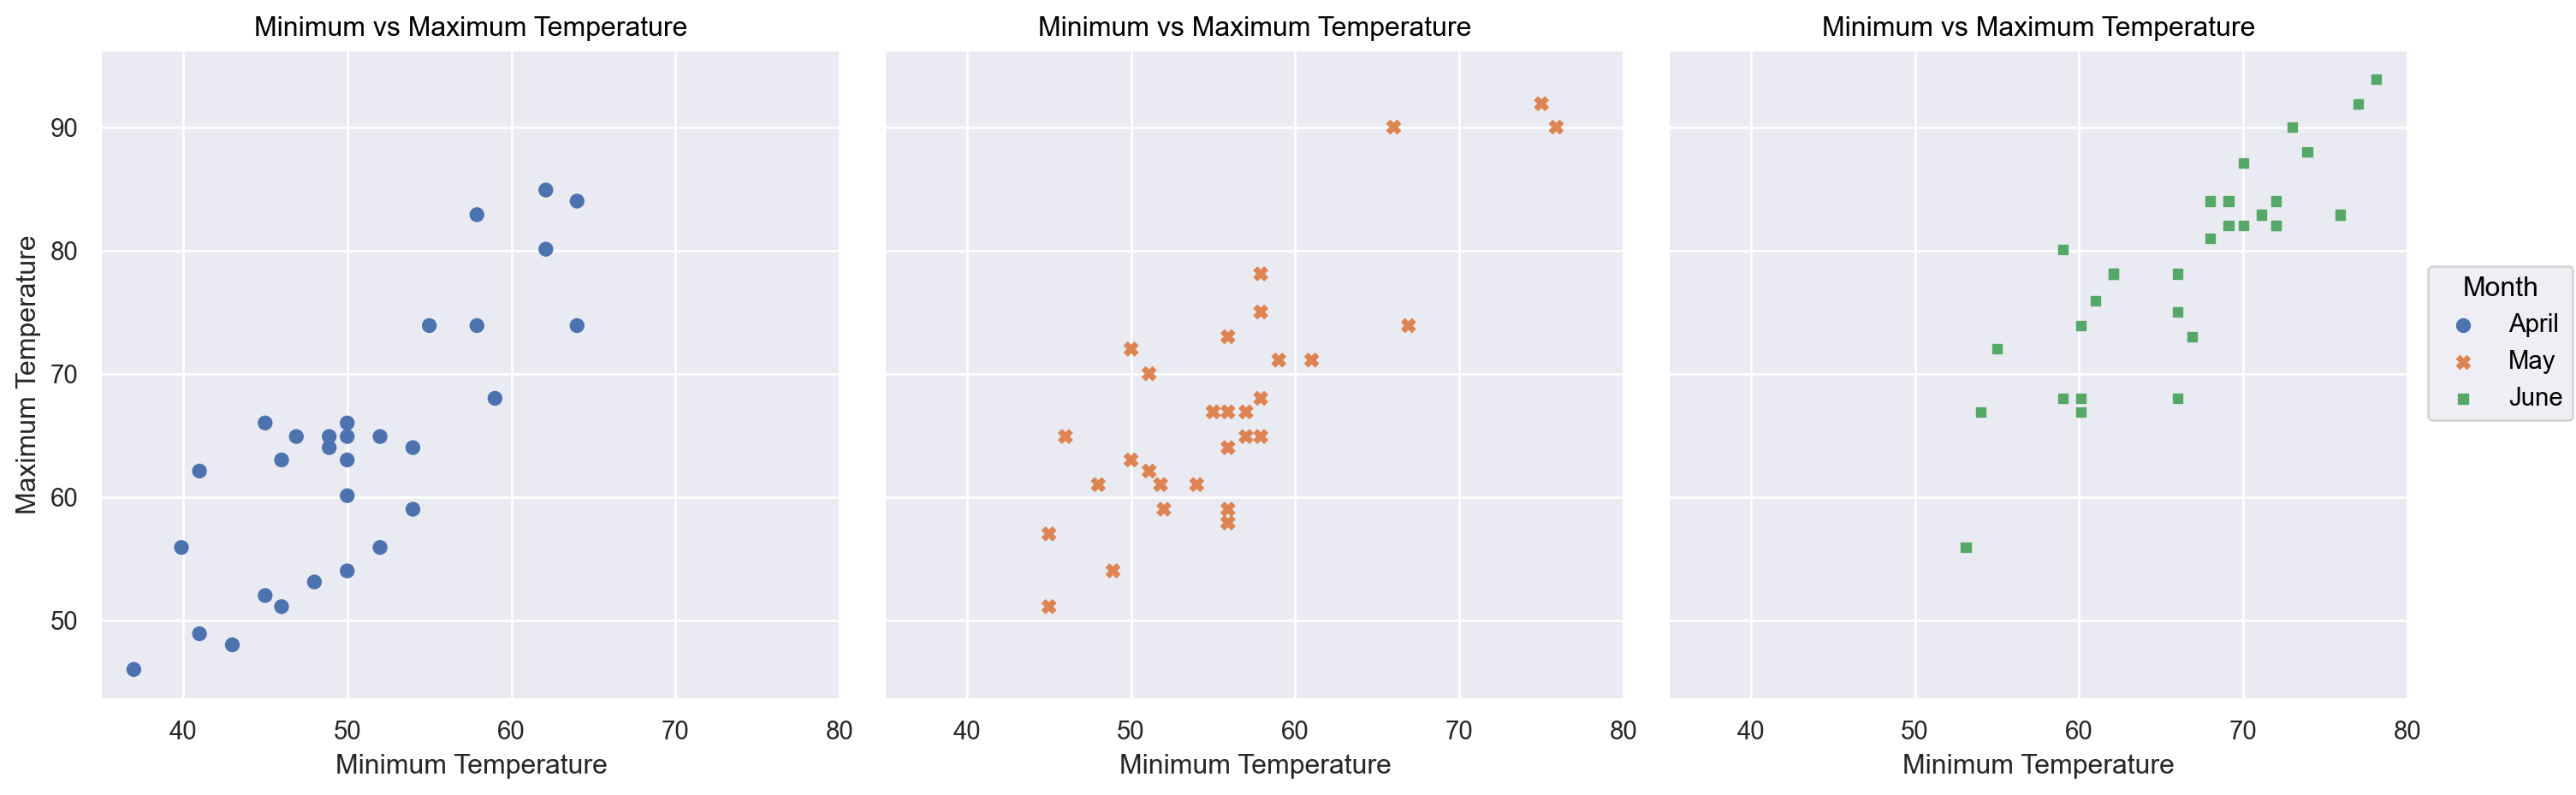

In [13]:
(
    so.Plot(
        data=crossings, x="min_temp",
        y="max_temp", color="month")
    .add(so.Dot(), marker="month")
    .facet(col="month")
    .layout(size=(15, 5))
    .label(title="Minimum vs Maximum Temperature",
           x="Minimum Temperature",y="Maximum Temperature",
           color=str.capitalize)
)

# Examples - Categorical Plots With Functions

In [14]:
crossings.head()

,date,day,month,max_temp,min_temp,precipitation,Brooklyn,Manhattan,Williamsburg,Queensboro
0,01/04/2017,Saturday,April,46.0,37.0,0.00,606,1446,1915,1430
1,02/04/2017,Sunday,April,62.1,41.0,0.00,2021,3943,4207,2862
2,03/04/2017,Monday,April,63.0,50.0,0.03,2470,4988,5178,3689
3,04/04/2017,Tuesday,April,51.1,46.0,1.18,723,1913,2279,1666
4,05/04/2017,Wednesday,April,63.0,46.0,0.00,2807,5276,5711,4197


In [15]:
bridge_crossings = crossings.melt(
    id_vars=["day", "date"],
    value_vars=["Brooklyn", "Manhattan", "Williamsburg", "Queensboro"],
    var_name="Bridges",
    value_name="Crossings",
).rename(columns={"day": "Day", "date": "Date"})

bridge_crossings.head()

,Day,Date,Bridges,Crossings
0,Saturday,01/04/2017,Brooklyn,606
1,Sunday,02/04/2017,Brooklyn,2021
2,Monday,03/04/2017,Brooklyn,2470
3,Tuesday,04/04/2017,Brooklyn,723
4,Wednesday,05/04/2017,Brooklyn,2807


<Axes: xlabel='Day', ylabel='Crossings'>

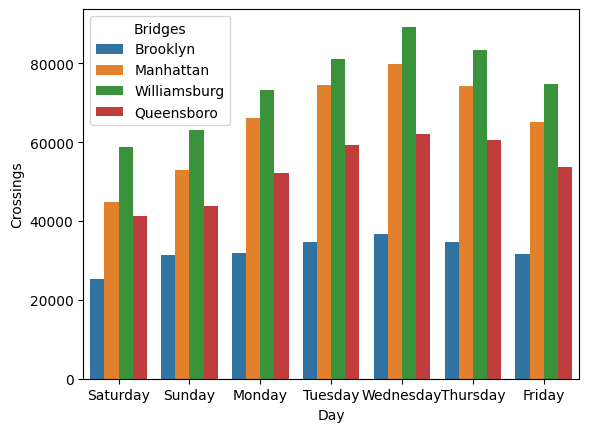

In [16]:
sns.barplot(
    data=bridge_crossings,
    x="Day", y="Crossings",
    hue="Bridges", errorbar=None,
    estimator="sum")

[Text(0.5, 0, '')]

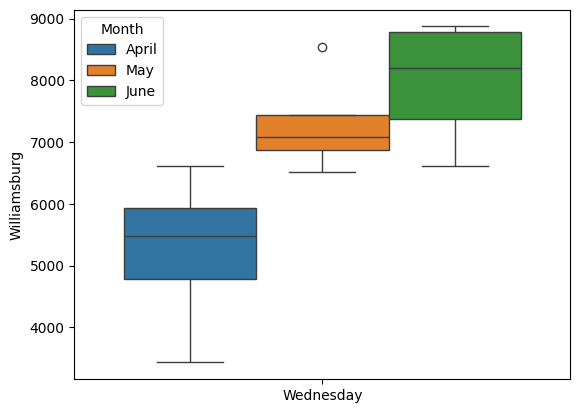

In [17]:
wednesday_crossings = (
    crossings.loc[crossings.day.isin(["Wednesday"])]
    .rename(columns={"month": "Month"})
)

(
    sns.boxplot(
        data=wednesday_crossings, x="day",
        y="Williamsburg", hue="Month")
    .set(xlabel=None)
)

## Exercise Solutions

**Task 1**: See if you can create a barplot for the weekend data only, with each day on a separate plot but in the same row. Each bar should show the highest number of crossings for each day.

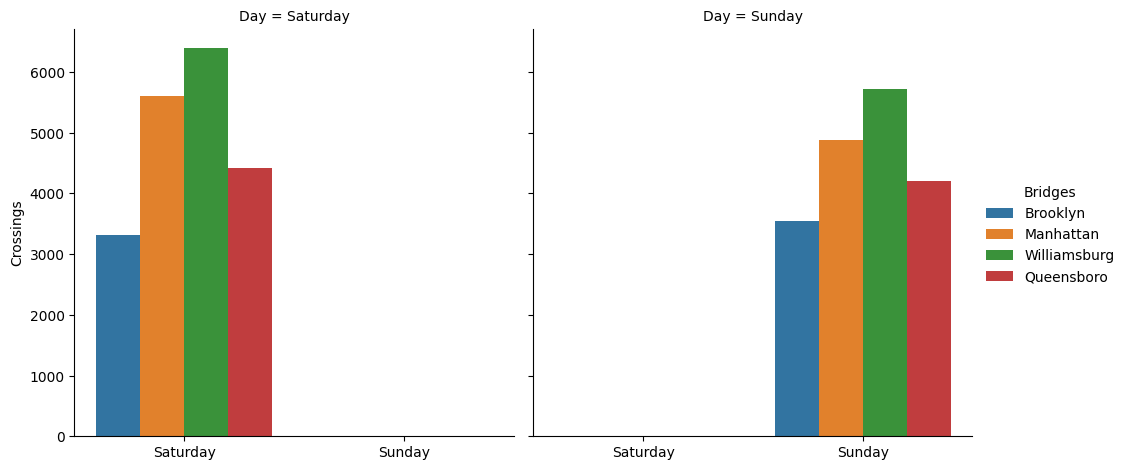

In [18]:
weekend = bridge_crossings.loc[bridge_crossings.Day.isin(["Saturday", "Sunday"])]

sns.catplot(data=weekend, x="Day", y="Crossings", hue="Bridges", col="Day", errorbar=None, estimator="max", kind="bar").set(xlabel=None)

**Task 2**: See if you can draw three boxplots in a row showing separate monthly crossings for the Brooklyn Bridge for the months of April to June.

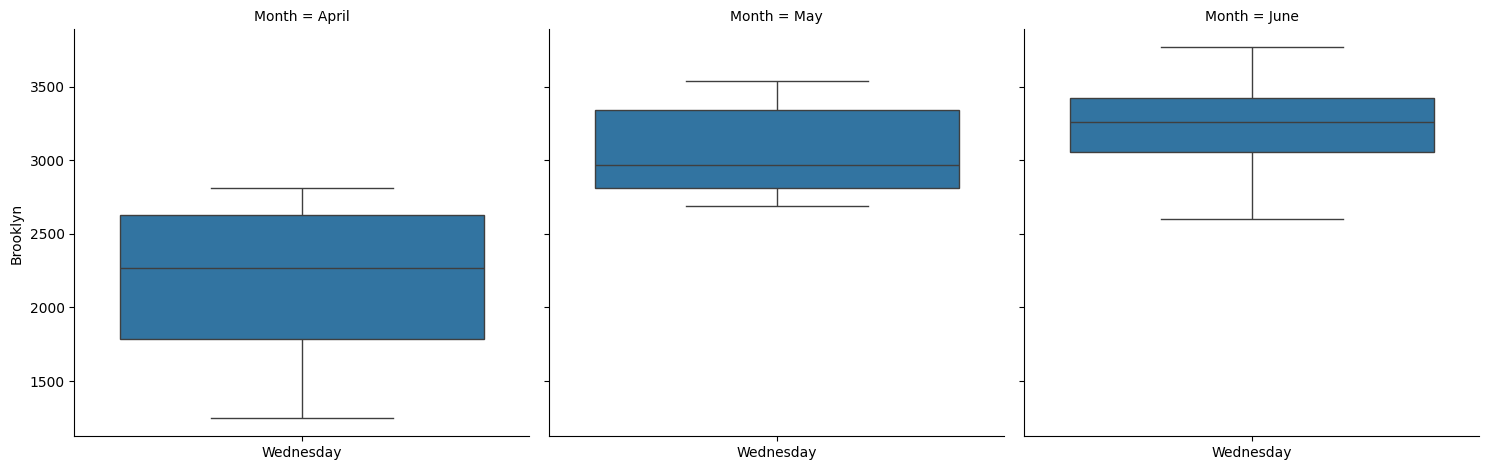

In [19]:
wednesday = crossings.loc[crossings.day.isin(["Wednesday"])].rename(columns={"month": "Month"})
sns.catplot(wednesday, x="day", y="Brooklyn", col="Month", kind="box").set(xlabel=None)

# Example Distribution Plots Using Functions

In [20]:
cereals_data = (pd.read_csv("cereals_data.csv")
                .rename(columns={"rating": "Rating"})
               )

cereals_data.head()

,name,manufacturer,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,Rating
0,Apple Cinnamon Cheerios,General Mills,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
1,Basic 4,General Mills,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
2,Cheerios,General Mills,110,6,2,290,2.0,17.0,1,105,25,1,1.00,1.25,50.764999
3,Cinnamon Toast Crunch,General Mills,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,19.823573
4,Clusters,General Mills,110,3,2,140,2.0,13.0,7,105,25,3,1.00,0.50,40.400208


[Text(0.5, 1.0, 'Cereal Ratings Distribution')]

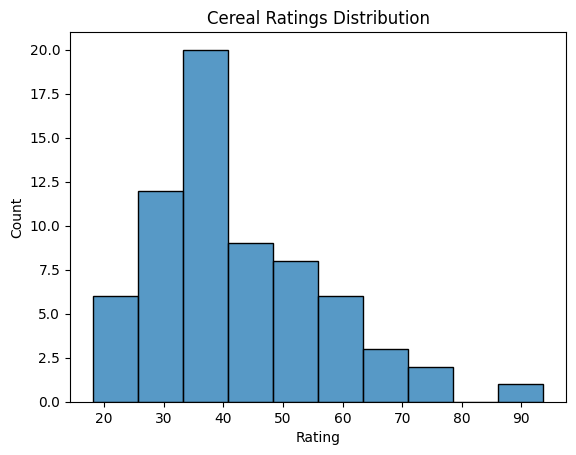

In [21]:
(
    sns.histplot(
        data=cereals_data, x="Rating", bins=10)
    .set(title="Cereal Ratings Distribution")
)

[Text(0.5, 1.0, 'Cereal Ratings KDE Curve')]

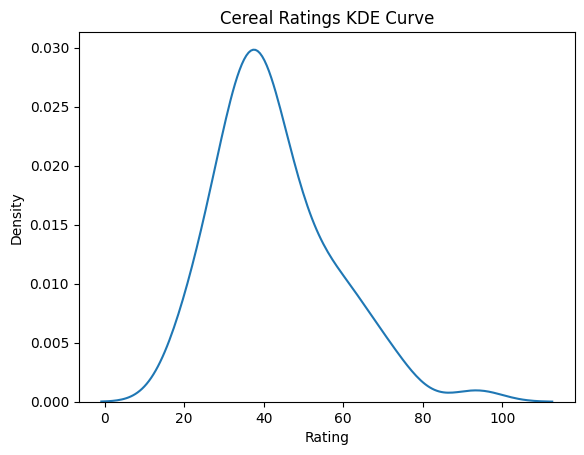

In [22]:
(
    sns.kdeplot(
        data=cereals_data, x="Rating")
    .set(title="Cereal Ratings KDE Curve")
)

[Text(0.5, 1.0, 'Cereal Rating Distribution')]

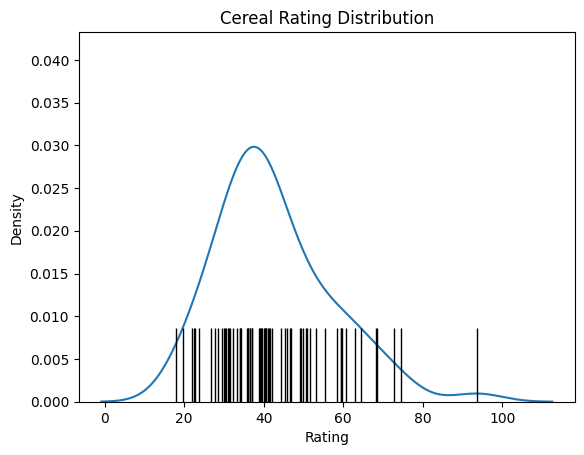

In [23]:
(
    sns.kdeplot(
        data=cereals_data, x="Rating")
)

(
    sns.rugplot(
        data=cereals_data, x="Rating", height=0.2, color="black")
    .set(title="Cereal Rating Distribution")
)

## Exercise Solutions

**Task 1:** Try and produce a single histogram showing cereal ratings such that there is a separate bar for each manufacturer. Keep to the same 10 bins.

<Axes: xlabel='Rating', ylabel='Count'>

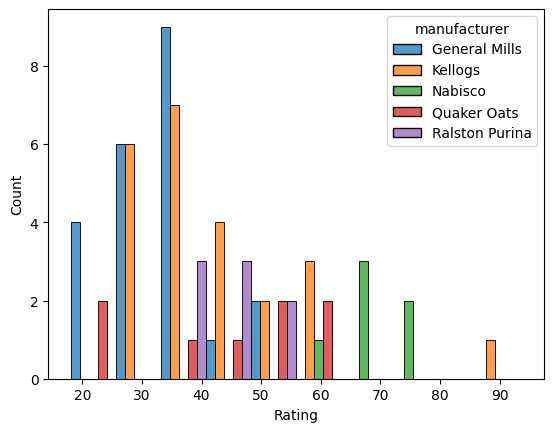

In [24]:
sns.histplot(data=cereals_data, x="Rating", bins=10, hue="manufacturer", multiple="dodge")

**Task 2:** See if you can superimpose a kde plot onto your original ratings histogram using only one functions.

<Axes: xlabel='Rating', ylabel='Count'>

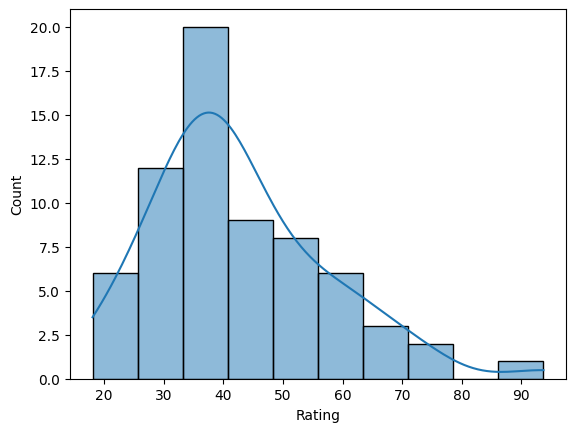

In [25]:
sns.histplot(data=cereals_data, x="Rating", kde=True, bins=10)

**Task 3**: Update your answer to task 1 such that each manufacturer's rating distribution appears on a separate plot and each has its own kde curve.

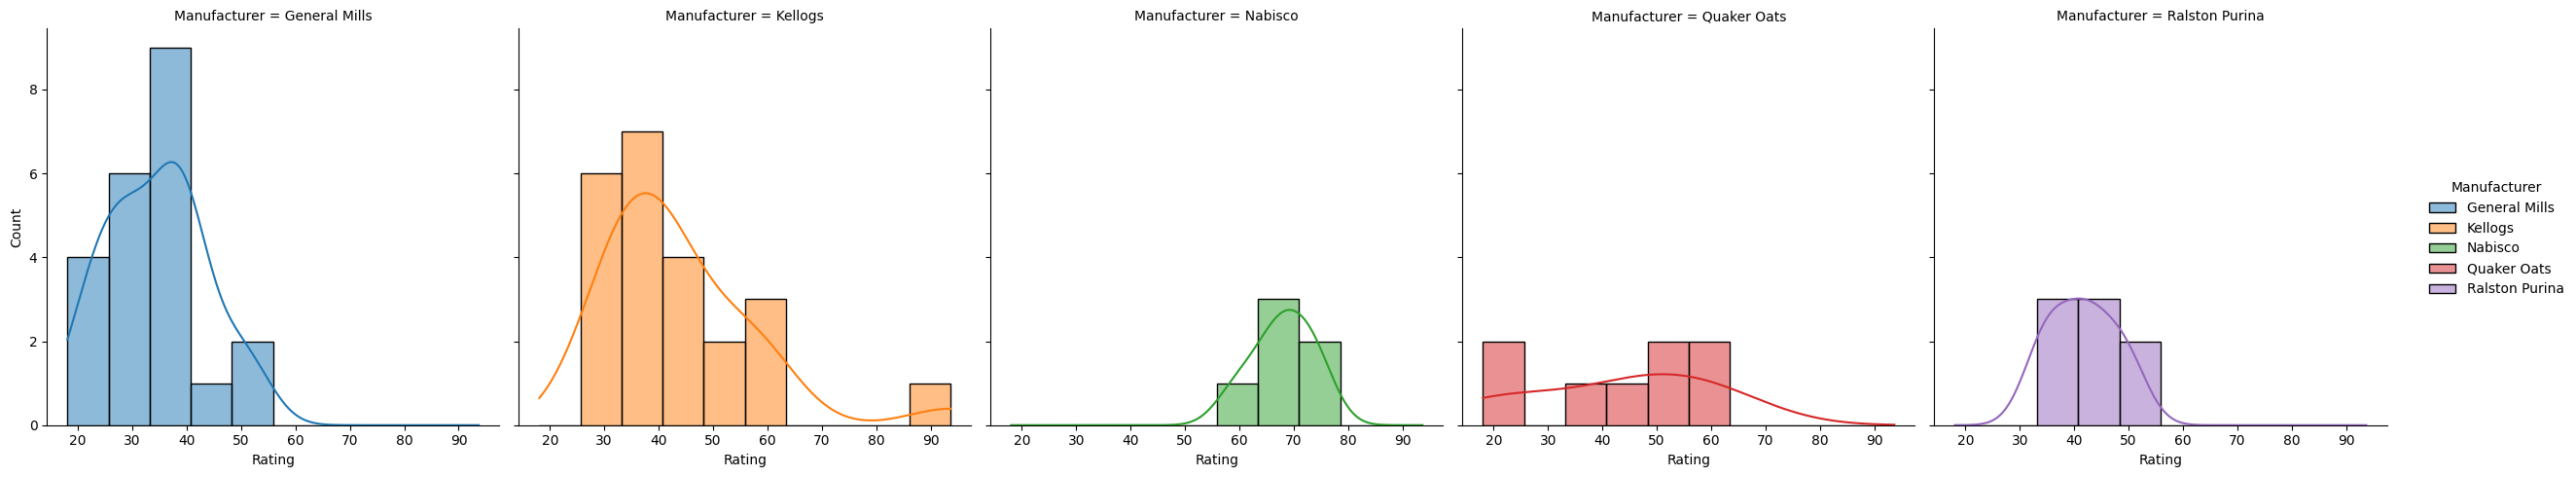

In [26]:
cereals_data.rename(columns={"manufacturer": "Manufacturer"}, inplace=True)

sns.displot(data=cereals_data, x="Rating", bins=10, hue="Manufacturer", kde=True, col="Manufacturer")

### Example Relational Plots Using Functions

([<matplotlib.axis.XTick at 0x211342e1fa0>,
 [Text(0.0, 0, '01/04/2017'),
  Text(30.0, 0, '01/05/2017'),
  Text(61.0, 0, '01/06/2017'),
  Text(90.0, 0, '30/06/2017')])

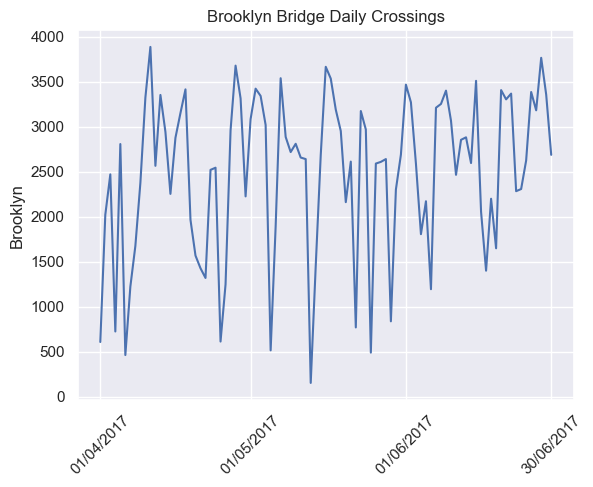

In [27]:
sns.set_theme(style="darkgrid")

(
    sns.lineplot(data=crossings,
                 x="date",y="Brooklyn")
    .set(title="Brooklyn Bridge Daily Crossings",
         xlabel=None)
)

plt.xticks(ticks=["01/04/2017", "01/05/2017",
                  "01/06/2017", "30/06/2017"],
           rotation=45)

**Task 1**  Using an appropriate dataframe, produce a single line plot showing the crossings for all bridges from April to June.

([<matplotlib.axis.XTick at 0x21134498ad0>,
 [Text(0.0, 0, '01/04/2017'),
  Text(30.0, 0, '01/05/2017'),
  Text(61.0, 0, '01/06/2017'),
  Text(90.0, 0, '30/06/2017')])

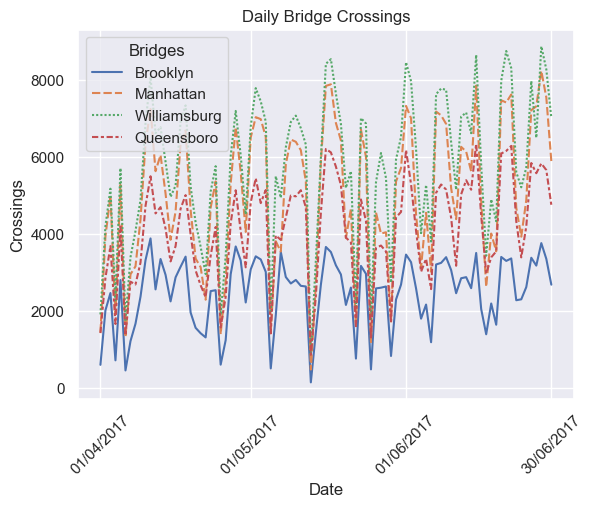

In [28]:
sns.lineplot(data=bridge_crossings, x="Date", y="Crossings", hue="Bridges", style="Bridges").set_title("Daily Bridge Crossings")
plt.xticks(ticks=["01/04/2017", "01/05/2017", "01/06/2017", "30/06/2017"], rotation=45)

**Task 2** Clarify your solution to exercise 1 by creating a separate subplot for each bridge.

([<matplotlib.axis.XTick at 0x211342e1d00>,
 [Text(0.0, 0, '01/04/2017'),
  Text(30.0, 0, '01/05/2017'),
  Text(61.0, 0, '01/06/2017'),
  Text(90.0, 0, '30/06/2017')])

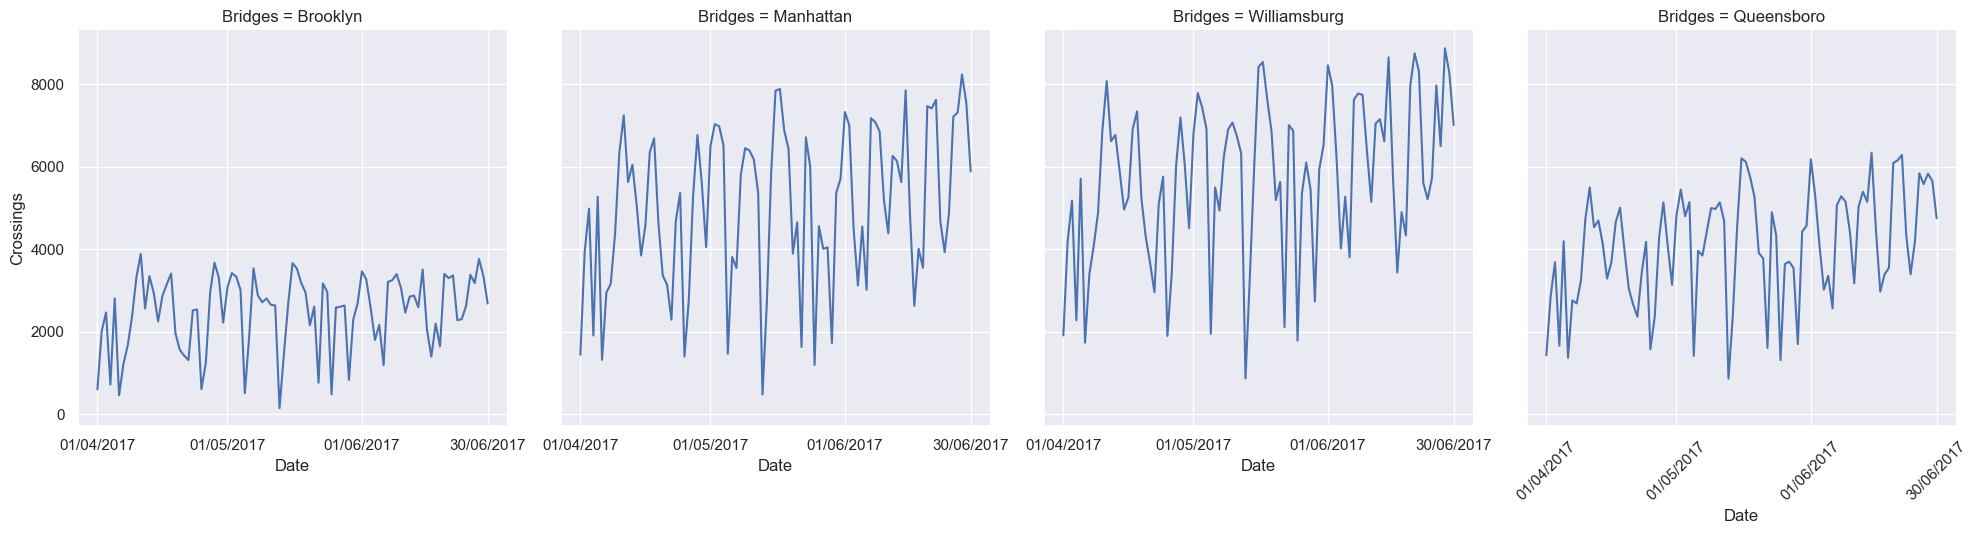

In [29]:
sns.relplot(data=bridge_crossings, x="Date", y="Crossings", col="Bridges", kind="line")
plt.xticks(ticks=["01/04/2017", "01/05/2017", "01/06/2017", "30/06/2017"], rotation=45)

# Regplots

[Text(0.5, 1.0, 'Regression Analysis of Temperatures'),
 Text(0.5, 0, 'Minimum Temperature'),
 Text(0, 0.5, 'Maximum Temperature')]

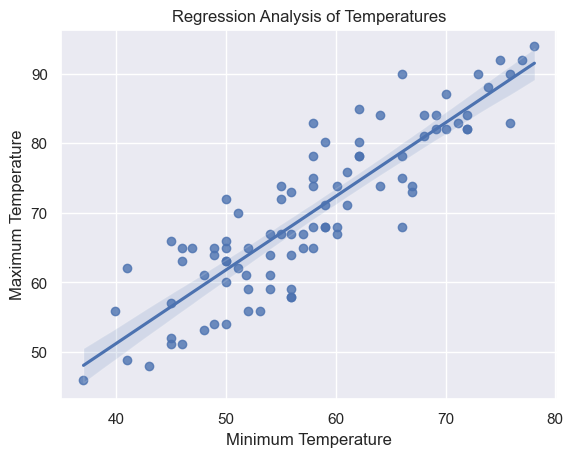

In [30]:
(
    sns.regplot(
        data=crossings, x="min_temp",
        y="max_temp", ci=95)
    .set(
        title="Regression Analysis of Temperatures",
        xlabel="Minimum Temperature",
        ylabel="Maximum Temperature")
)

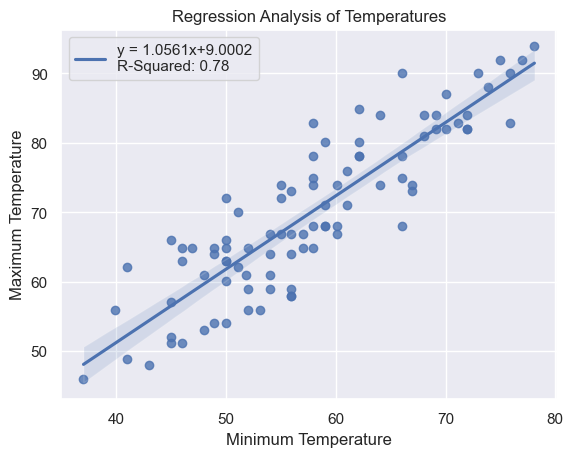

In [31]:
from sklearn.linear_model import LinearRegression

x=crossings.loc[:, ["min_temp"]]
y=crossings.loc[:, "max_temp"]

model = LinearRegression()
model.fit(x, y)

r_squared = f"R-Squared: {model.score(x, y):.2f}"
best_fit = f"y = {model.coef_[0]:.4f}x{model.intercept_:+.4f}"

ax = sns.regplot(
    data=crossings, x="min_temp", y="max_temp",
    line_kws={"label": best_fit + "\n" + r_squared}
)

ax.set_xlabel("Minimum Temperature")
ax.set_title("Regression Analysis of Temperatures")
ax.set_ylabel("Maximum Temperature")
ax.legend()

**Task 1**: Create a single plot showing a separate regression plot with equation, for each of the three months.

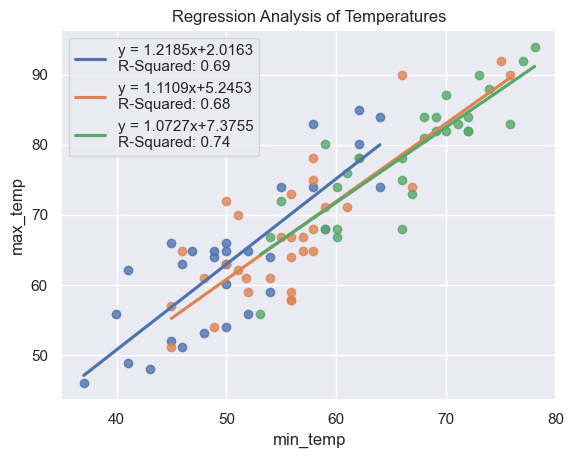

In [32]:
def calculate_regression(data):
    x=data.loc[:, ["min_temp"]]
    y=data.loc[:, "max_temp"]
    model = LinearRegression()
    model.fit(x, y)
    r_squared = f"R-Squared: {model.score(x, y):.2f}"
    best_fit = f"y = {model.coef_[0]:.4f}x{model.intercept_:+.4f}"
    return r_squared, best_fit

april_crossings = crossings[crossings.month=="April"]
r_squared, best_fit = calculate_regression(april_crossings)
ax = sns.regplot(data=april_crossings, x="min_temp", y="max_temp", ci=None, line_kws={"label": best_fit + "\n" + r_squared})
ax.set_title("Regression Analysis of Temperatures")
ax.legend()

may_crossings = crossings[crossings.month=="May"]
r_squared, best_fit = calculate_regression(may_crossings) 
ax = sns.regplot(data=may_crossings, x="min_temp", y="max_temp", ci=None, line_kws={"label": best_fit + "\n" + r_squared})
ax.set_title("Regression Analysis of Temperatures")
ax.legend()

june_crossings = crossings[crossings.month=="June"]
r_squared, best_fit = calculate_regression(june_crossings)
ax = sns.regplot(data=june_crossings, x="min_temp", y="max_temp", ci=None, line_kws={"label": best_fit + "\n" + r_squared})
ax.set_title("Regression Analysis of Temperatures")
ax.legend()

**Task 2**: Use an appropriate figure level function to create a separate regression plot for each month. 

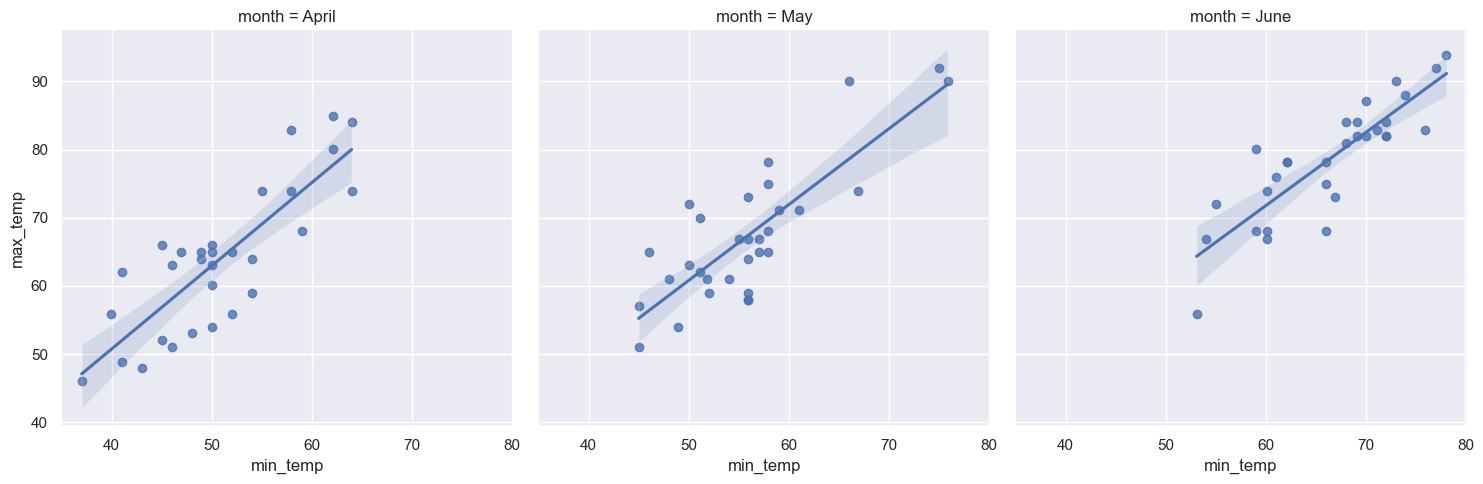

In [33]:
sns.lmplot(data=crossings, x="min_temp", y="max_temp", col="month")

**Task 3**: See if you can add the correct equation onto each of the three plots you created in task 2.

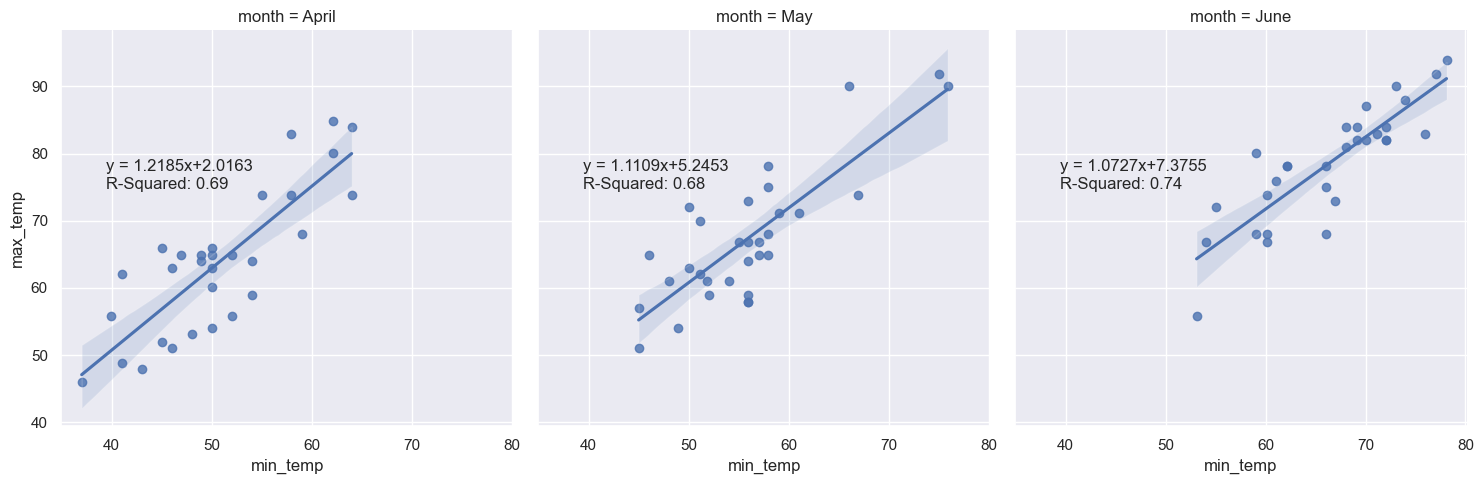

In [34]:
def regression_equation(data, **kws):
    x=data.loc[:, ["min_temp"]]
    y=data.loc[:, "max_temp"]
    model = LinearRegression()
    model.fit(x, y)
    r_squared = f"R-Squared: {model.score(x, y):.2f}"
    best_fit = f"y = {model.coef_[0]:.4f}x{model.intercept_:+.4f}"
    ax = plt.gca()  # Get current Axes.
    ax.text(.1, .6, f"{best_fit}{chr(10)}{r_squared}", transform=ax.transAxes)

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")
sns.lmplot(data=crossings, x="min_temp", y="max_temp", col="month").map_dataframe(regression_equation)

# Creating Seaborn Data Visualizations Using Objects

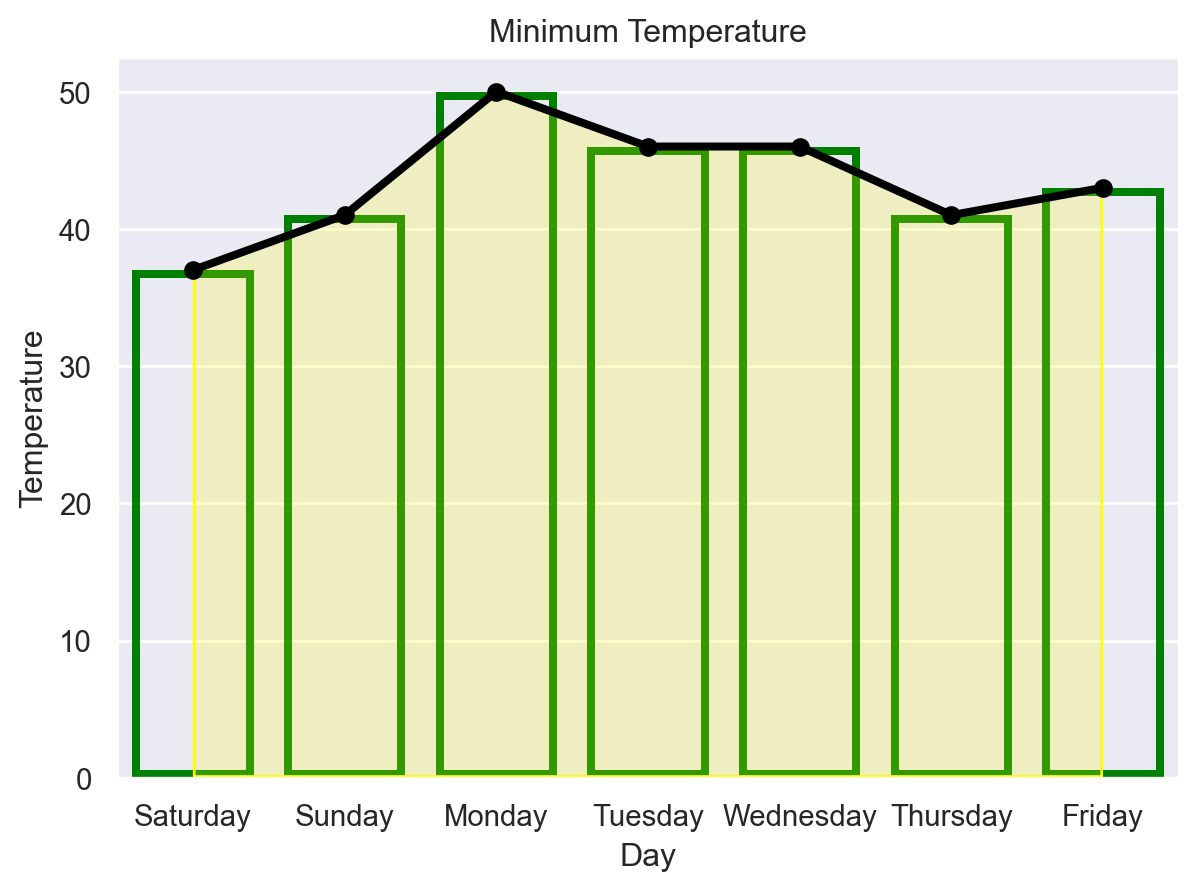

In [35]:
first_week = crossings.loc[crossings.month=="April"].head(7)

(
    so.Plot(
        first_week, x="day", y="min_temp")
    .add(so.Line(color="black", linewidth=3, marker="o"))
    .add(so.Bar(color="green", fill=False, edgewidth=3))
    .add(so.Area(color="yellow"))
    .label(x="Day", y="Temperature", title="Minimum Temperature")
)

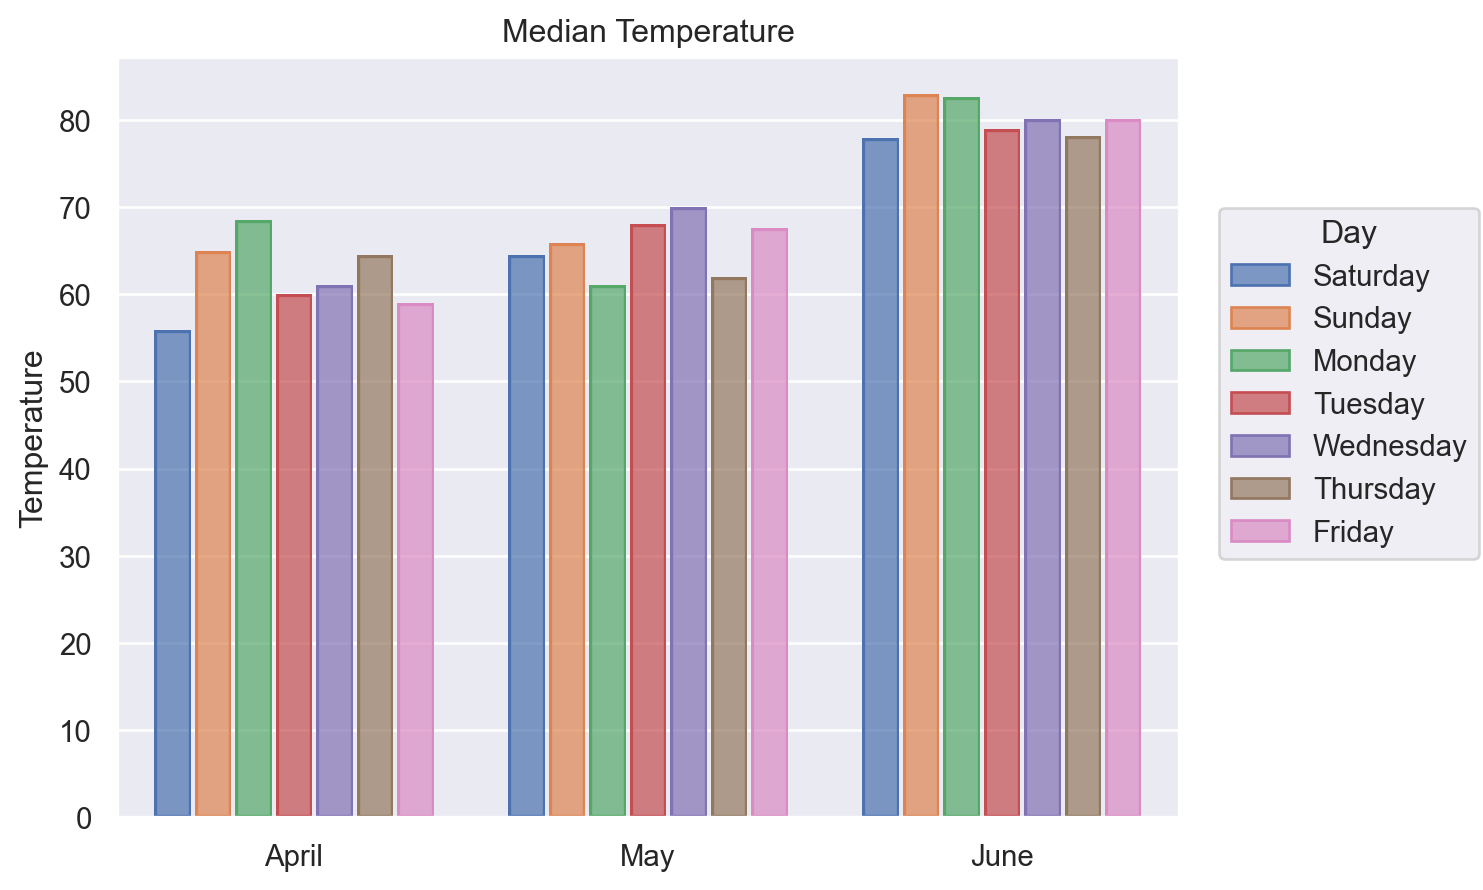

In [36]:
(
    so.Plot(
        crossings, x="month", y="max_temp", color="day")
    .add(so.Bar(),
         so.Agg(func="median"),
         so.Dodge(gap=.1))
    .label(x=None, y="Temperature",
           title="Median Temperature", color="Day")
)

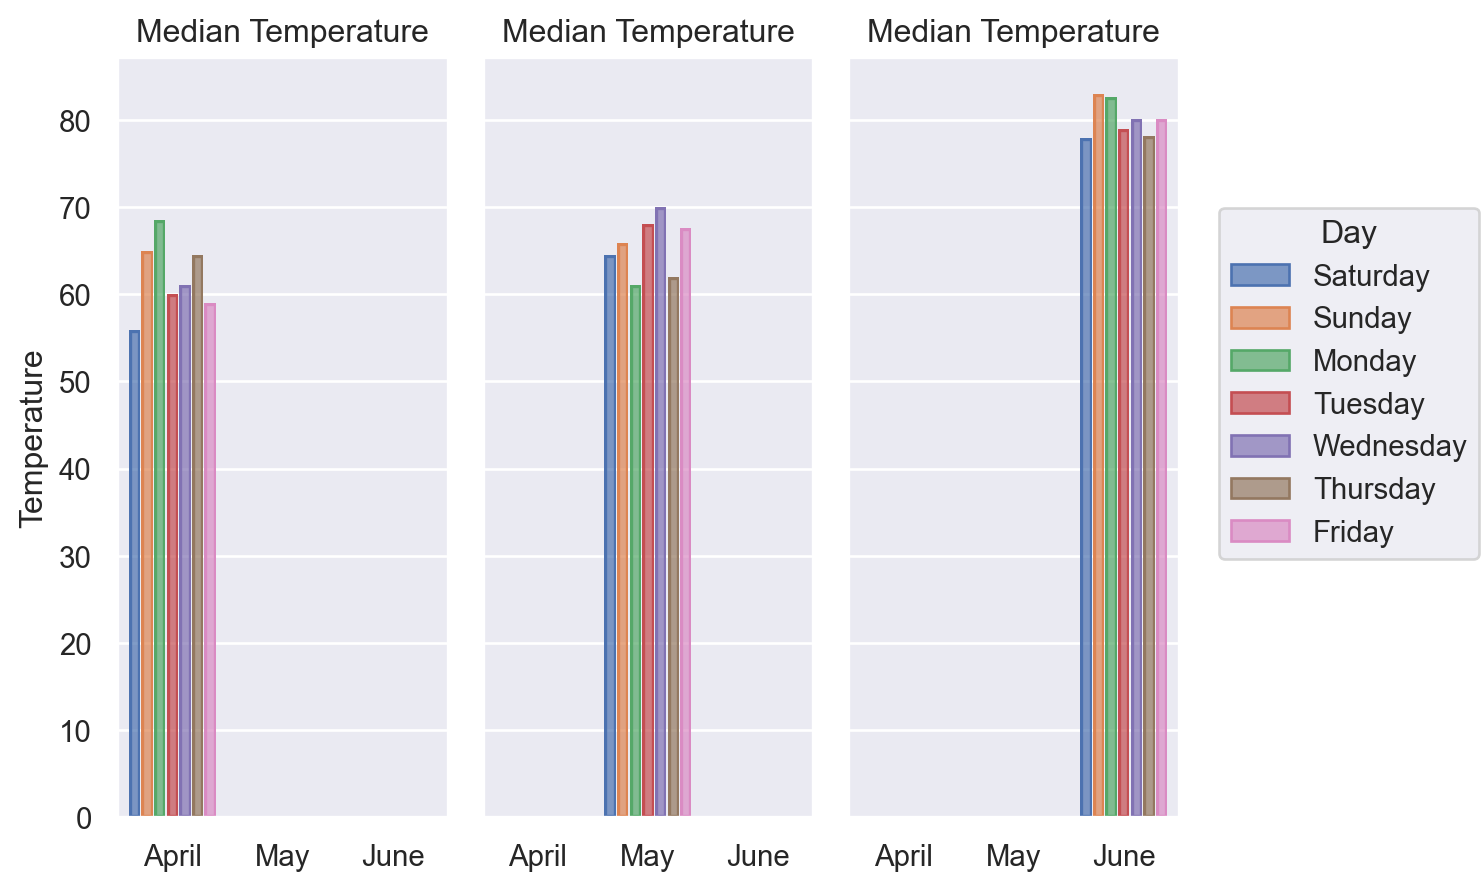

In [37]:
(
    so.Plot(
        crossings, x="month", y="max_temp", color="day")
    .facet(col="month")
    .add(so.Bar(),
         so.Agg(func="median"),
         so.Dodge(gap=.1))
    .label(x=None, y="Temperature",
           title="Median Temperature", color="Day")
)

**Task 1:** Using the objects API, redraw the min_temperature vs max_temperature scatterplot you created at the start of the article using objects. Also, make sure each marker has a different color depending on the days it represents.  Finally, each marker should be represented by a star.)

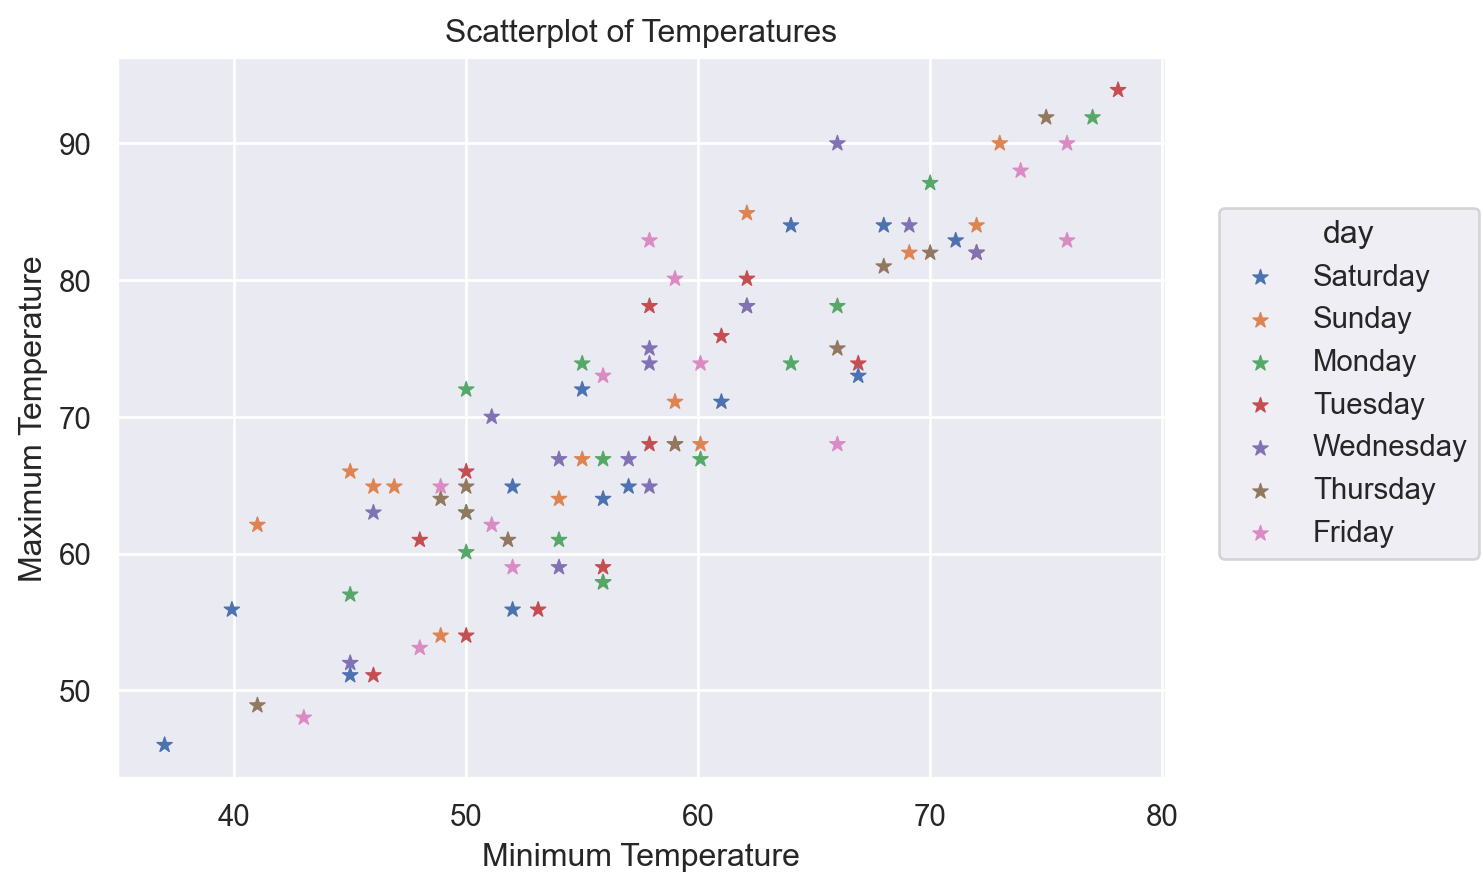

In [38]:
(
    so.Plot(crossings, x="min_temp", y="max_temp", color="day")
    .add(so.Dot(marker="*"))
    .label(x="Minimum Temperature", y="Maximum Temperature", title="Scatterplot of Temperatures")
)

**Task 2**: Using the objects API, create a barplot showing the maximum and minimum number of bridge crossings for each of the four bridges.

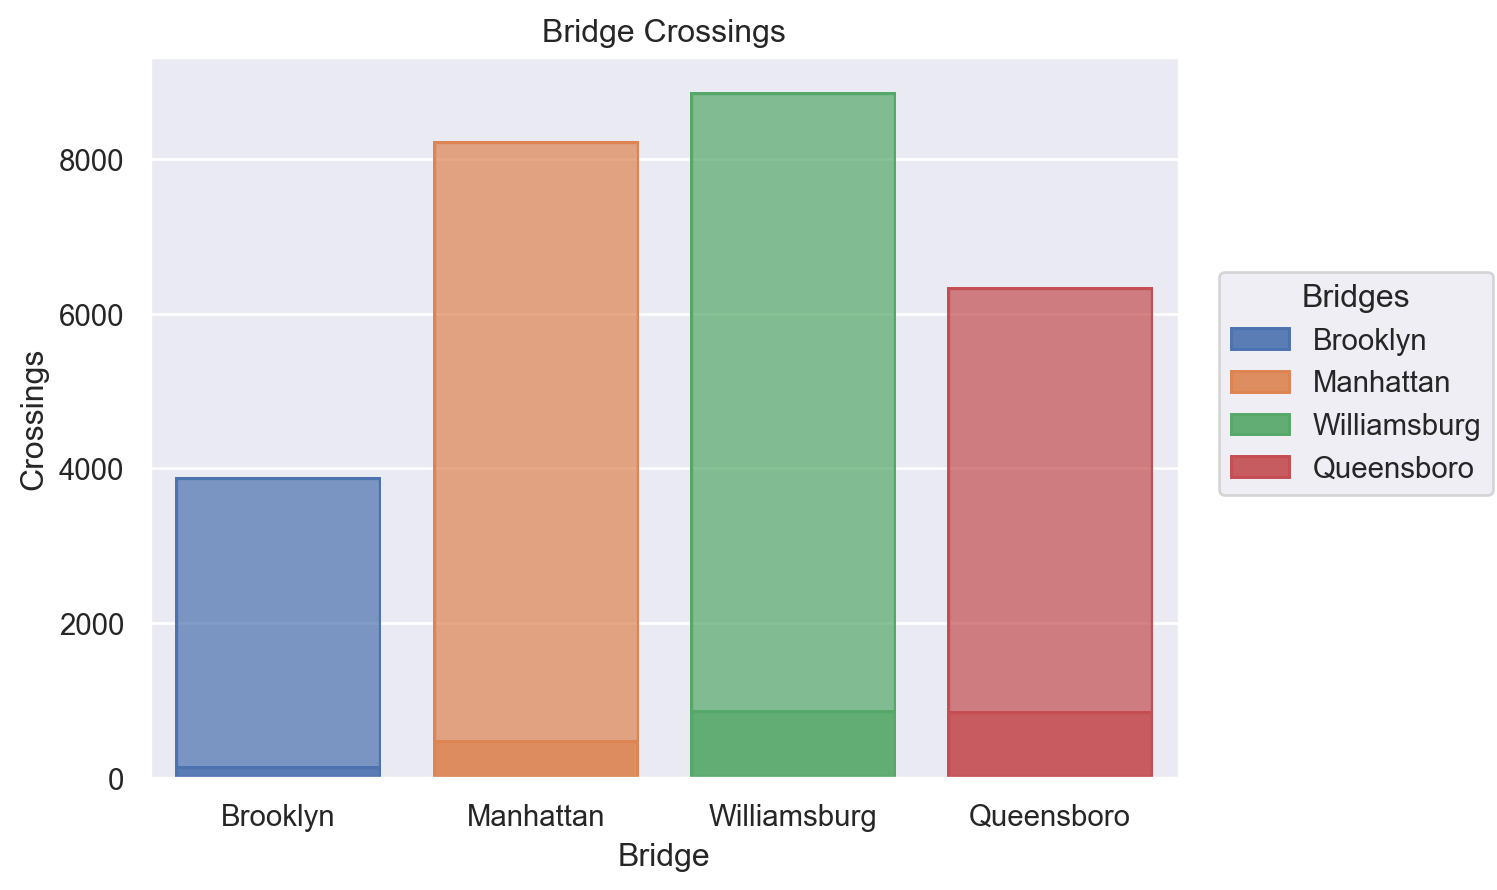

In [39]:
(
    so.Plot(data=bridge_crossings, x="Bridges", y="Crossings", color="Bridges")
    .add(so.Bar(), so.Agg("max"))
    .add(so.Bar(), so.Agg("min"))
    .label(x="Bridge", y="Crossings", title="Bridge Crossings")
)

**Task 3**: Using the objects API, create a barplot analyzing the counts of breakfast cereal calories. The calories should be placed into 10 equal-sized bins.

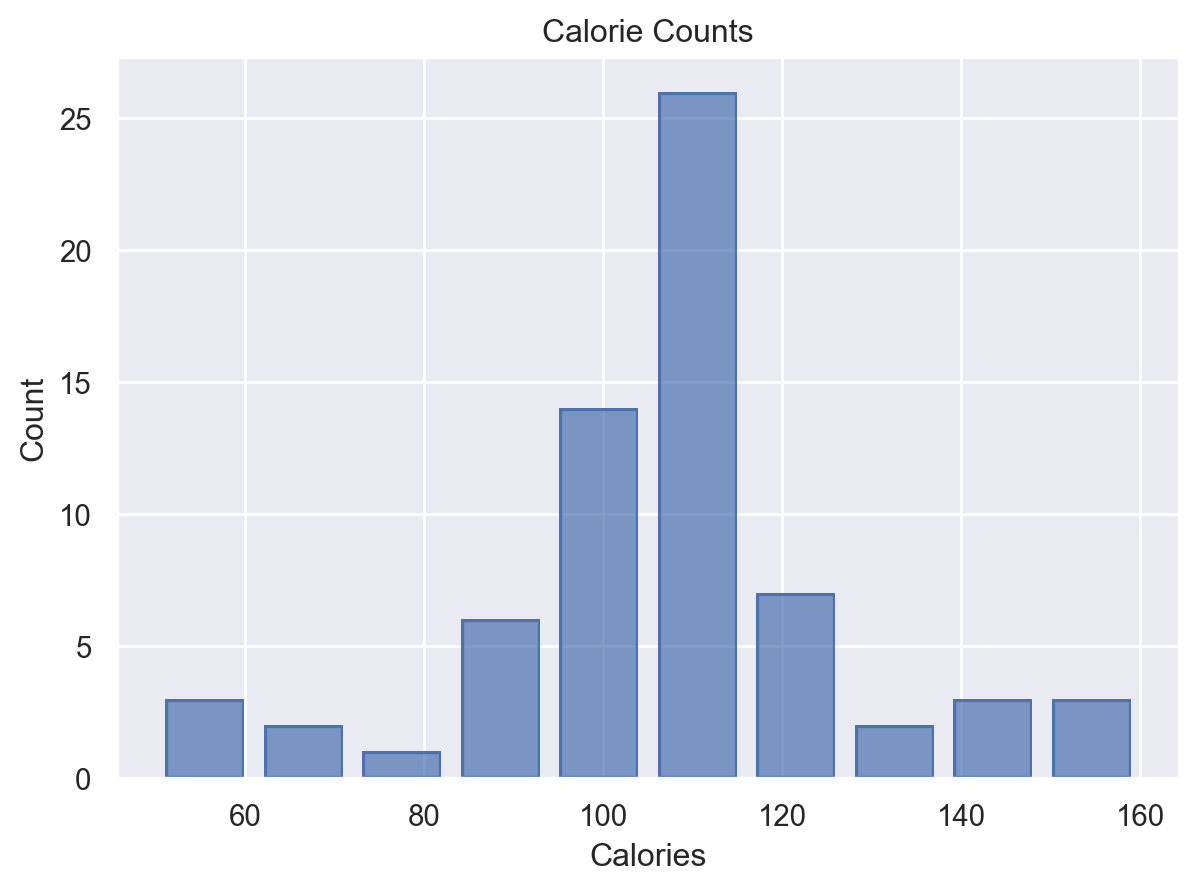

In [40]:
(
    so.Plot(data=cereals_data, x="calories")
    .add(so.Bar(), so.Hist(bins=10))
    .label(x="Calories", y="Count", title="Calorie Counts")
)